<a href="https://colab.research.google.com/github/kuznechek/Numerical-methods/blob/main/RegressionLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Обучение нейронной сети для задачи регрессии

0.025543492287397385


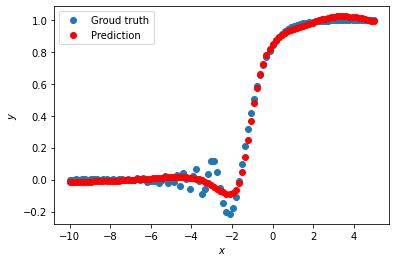

In [ ]:
import torch
import matplotlib.pyplot as plt

def target_function(x):
    return 2**x * torch.sin(2**-x)

def predict(net, x, y):
    y_pred = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
def metric(pred, target):
   return (pred - target).abs().mean()

class RegressionNet(torch.nn.Module):
  def __init__(self, hidden):
    super(RegressionNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, hidden)
    self.act1 = torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(hidden, hidden)
    self.act2 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(hidden, 1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

net = RegressionNet(20)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

print(metric(net.forward(x_validation), y_validation).item())
predict(net, x_validation, y_validation)